In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shukufahuseynzade","key":"ab8a1744d549c290d870d9fd65060cfe"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
License(s): CC-BY-SA-4.0


In [ ]:
!unzip /content/vegetable-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

In [ ]:
import tensorflow as tf
import os

In [ ]:
class_names = os.listdir('/content/Vegetable Images/test')

In [ ]:
train_dir = '/content/Vegetable Images/train'
test_dir = '/content/Vegetable Images/test'
val_dir = '/content/Vegetable Images/validation'

In [ ]:
IMG_SIZE = (224,224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, label_mode='int', image_size=IMG_SIZE,
                                                                 crop_to_aspect_ratio=True)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, label_mode='int', image_size=IMG_SIZE,
                                                                crop_to_aspect_ratio=True)
val_data = tf.keras.preprocessing.image_dataset_from_directory(val_dir, label_mode='int', image_size=IMG_SIZE,
                                                                crop_to_aspect_ratio=True)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [ ]:
base_model = tf.keras.applications.xception.Xception(include_top=False)
base_model.trainable = False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
preprocess = tf.keras.applications.xception.preprocess_input

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[224,224,3]),
    tf.keras.layers.Lambda(preprocess),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(15, activation='softmax', kernel_initializer='glorot_normal')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.SGD(momentum=0.9),
              metrics=['accuracy'])

In [ ]:
model.fit(train_data, validation_data=val_data, epochs=3)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 174ms/step - accuracy: 0.8748 - loss: 0.5247 - val_accuracy: 0.9877 - val_loss: 0.0460
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 133s 174ms/step - accuracy: 0.9920 - loss: 0.0320 - val_accuracy: 0.9923 - val_loss: 0.0277
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 174ms/step - accuracy: 0.9963 - loss: 0.0175 - val_accuracy: 0.9937 - val_loss: 0.0235


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + '/' + target_class
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + '/' +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f"Image shape: {img.shape}")

Image shape: (224, 224, 3)


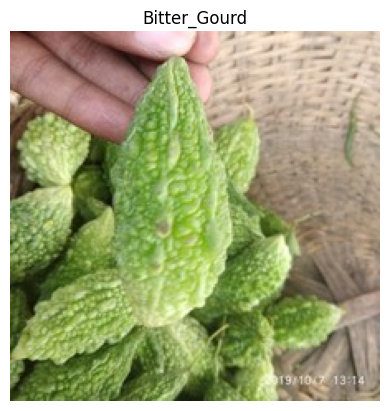

In [ ]:
view_random_image(target_dir='/content/Vegetable Images/test', target_class='Bitter_Gourd')